# Palmer Penguins (.ipynb)

In [1]:
import pandas as pd
import altair as alt
import seaborn as sns
from matplotlib import pyplot as plt

Data from [Palmer Penguins R
package](https://allisonhorst.github.io/palmerpenguins/)

In [2]:
penguins = pd.read_csv("https://pos.it/palmer-penguins-github-csv")

In [3]:
penguins.groupby("species").size().reset_index(name = "count")

In [4]:
colors = ["#FF8C00", "#A020F0", "#008B8B"]
sns.set_palette(colors, n_colors = 3)

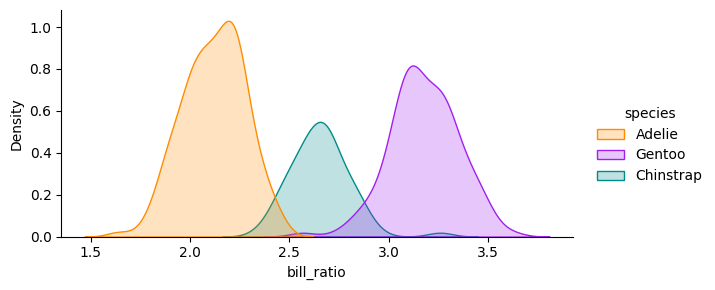

In [5]:
penguins["bill_ratio"] = (
   penguins["bill_length_mm"] / penguins["bill_depth_mm"] 
)
sns.displot(penguins, 
            x = "bill_ratio", 
            hue = "species", 
            kind = "kde", fill = True, aspect = 2, height = 3)
plt.show()

``` python
sns.displot(penguins, 
            x = "bill_depth_mm", 
            hue = "species", 
            kind = "kde", fill = True, 
            aspect = 2, height = 3)
plt.show()
sns.displot(penguins, 
            x = "bill_length_mm", 
            hue = "species", 
            kind = "kde", fill = True, 
            aspect = 2, height = 3)
plt.show()
```

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-bill-marginal-1">
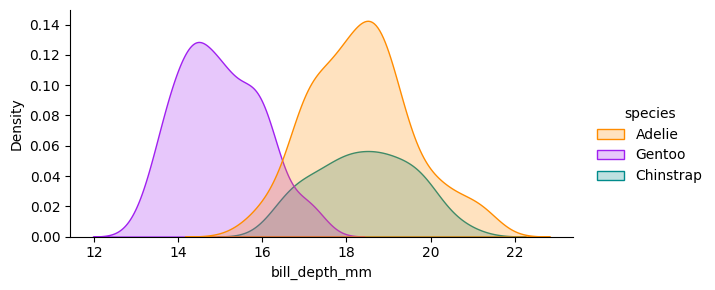
<figcaption>(a) Gentoo penguins tend to have thinner bills,</figcaption>
</figure>
</div></td>
<td style="text-align: left;"><div
class="cell-output cell-output-display" width="50.0%"
data-layout-align="left">
<figure id="fig-bill-marginal-2">
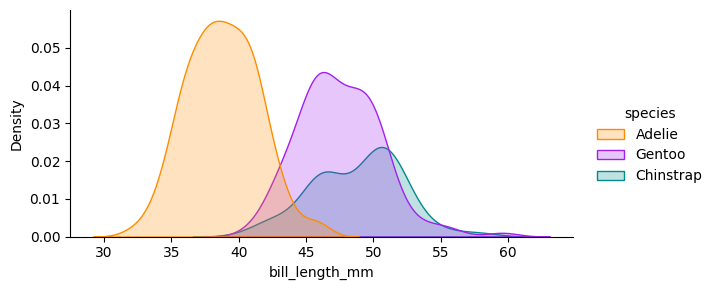
<figcaption>(b) and Adelie penguins tend to have shorter
bills.</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

图 1: Marginal distributions of bill dimensions

In [7]:
scale = alt.Scale(domain = ['Adelie', 'Chinstrap', 'Gentoo'],
                  range = colors)

In [8]:
alt.Chart(penguins).mark_circle(size=60).encode(
    alt.X('bill_length_mm',
        scale=alt.Scale(zero=False)
    ),
    alt.Y('bill_depth_mm',
        scale=alt.Scale(zero=False)
    ),
    color = alt.Color('species', scale = scale),
    tooltip=['species', 'sex', 'island']
)